In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model('trained_model.keras')

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                        

Visualizing the image of test set

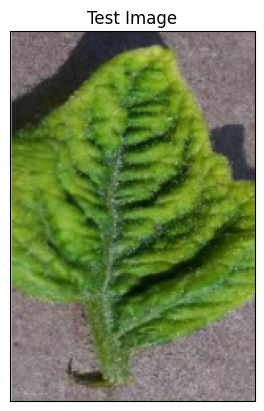

In [63]:
import cv2
image_path = r"C:\Users\ASUS\OneDrive\Pictures\Screenshots\Screenshot 2025-04-20 061823.png"

img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

Testing the model

In [64]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_array = tf.keras.preprocessing.image.img_to_array(image)
input_array = np.array([input_array])
print(input_array.shape)

(1, 128, 128, 3)


In [65]:
prediction = model.predict(input_array)
prediction

1/1 [==============================] - 0s 35ms/step


array([[3.58386227e-13, 7.76739784e-14, 9.03672783e-17, 1.27438121e-11,
        1.29033479e-16, 1.04323004e-13, 2.14465373e-11, 2.50586227e-15,
        5.00911007e-18, 5.16730105e-13, 4.99726345e-12, 3.71254947e-14,
        5.08602322e-14, 8.35460451e-11, 2.27561525e-08, 1.46983337e-12,
        3.32675619e-12, 3.21232968e-15, 7.13014592e-10, 8.12507572e-09,
        5.04567491e-21, 8.13034196e-10, 3.12792681e-10, 8.32968694e-11,
        6.79535872e-10, 1.09076154e-06, 1.23777441e-14, 2.09804471e-14,
        6.32316953e-13, 2.20402285e-06, 1.52858107e-07, 3.14032762e-12,
        9.49837320e-10, 5.55029182e-11, 5.49282753e-09, 9.99996543e-01,
        3.91378985e-15, 1.11318650e-17]], dtype=float32)

In [66]:
result_index = np.argmax(prediction)
result_index

35

In [61]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

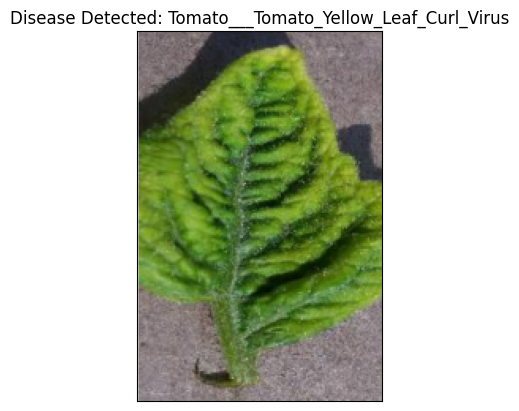

In [67]:
model_prediction = class_name[result_index]

plt.imshow(img)
plt.title(f"Disease Detected: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()
